In [19]:
# Import Libraries
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [27]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.shape

(50, 5)

In [32]:
x = df.iloc[:,1:]
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [33]:
import scipy.cluster.hierarchy as shc

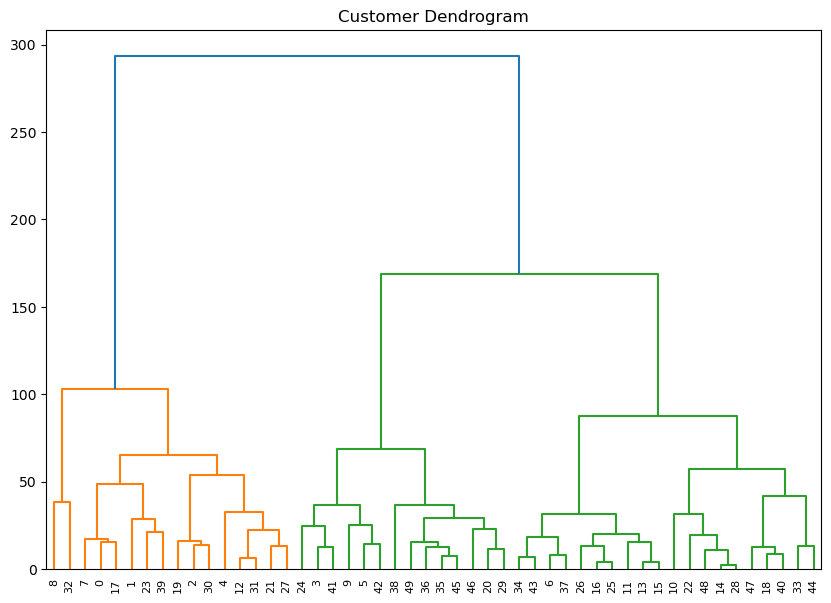

In [34]:
#construction of dendragram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(x, method='complete'))

In [57]:
# forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')


In [58]:
y = cluster.fit_predict(x)
y = pd.DataFrame(y)
y.value_counts()


0    14
1    14
2    10
4    10
3    2 
dtype: int64

In [65]:
# intializing KMeans
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=4)

In [66]:
# fitting with inputs
KMeans = KMeans.fit(x)

In [67]:
#predicting the clusters
y = KMeans.predict(x)

y = pd.DataFrame(y)
y.value_counts()

1    16
2    14
0    10
3    10
dtype: int64

In [76]:
# DB SCAN
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(x)
df_new = stscaler.transform(x)
df_new

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [116]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [120]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [121]:
# noisy samples are given the labels as -1
dbscan.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [122]:
c1 = pd.DataFrame(dbscan.labels_,columns=["cluster"])
c1.value_counts()


cluster
-1         50
dtype: int64

In [123]:
c1 = pd.DataFrame(dbscan.labels_,columns=["cluster"])
c1.value_counts()

cluster
-1         50
dtype: int64

In [127]:
df_neww = pd.concat([df,c1],axis=1)
df_neww

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [130]:
noisedata = df_neww[df_neww['cluster']==-1]
print(noisedata)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster
0   Alabama         13.2    236      58        21.2 -1      
1   Alaska          10.0    263      48        44.5 -1      
2   Arizona         8.1     294      80        31.0 -1      
3   Arkansas        8.8     190      50        19.5 -1      
4   California      9.0     276      91        40.6 -1      
5   Colorado        7.9     204      78        38.7 -1      
6   Connecticut     3.3     110      77        11.1 -1      
7   Delaware        5.9     238      72        15.8 -1      
8   Florida         15.4    335      80        31.9 -1      
9   Georgia         17.4    211      60        25.8 -1      
10  Hawaii          5.3     46       83        20.2 -1      
11  Idaho           2.6     120      54        14.2 -1      
12  Illinois        10.4    249      83        24.0 -1      
13  Indiana         7.2     113      65        21.0 -1      
14  Iowa            2.2     56       57        11.3 -1      
15  Kansas          6.0 

In [131]:
finaldata = df_neww[df_neww['cluster']==0]
finaldata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
